<a href="https://colab.research.google.com/github/Humberto141/Proyectos-de-Python/blob/main/version_2_RN_CON_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
"IMPORTACION DE LIBRERIAS"


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


In [59]:
a = [1, 2, 3, 666, 777, 888, 1000, 4]

In [63]:
a = np.array(a)
a

array([   1,    2,    3,  666,  777,  888, 1000,    4])

In [62]:
a.shape

(8,)

In [71]:
b = a.reshape(-1, 1)

In [72]:
print(b.shape)
b

(8, 1)


array([[   1],
       [   2],
       [   3],
       [ 666],
       [ 777],
       [ 888],
       [1000],
       [   4]])

In [2]:
"DEFINIR LOS HIPERPARAMETROS"

input_size = 1
output_size = 1
num_epochs = 10000
learning_rate = 0.01


In [121]:
import numpy as np

# Generar los datos x
x = np.linspace(-10, 10, 1000, dtype=np.float32)  # Rango de valores de x

# Calcular los cuadrados de los valores de x
y_true = x**2
y_true_2 = np.sin(-x)

# Generar ruido aleatorio
ruido = np.random.normal(-10, 10, 1000)  # Media: 0, Desviación estándar: 10
ruido2 = np.random.normal(0, 0.4, size = (1, 1000))

# Agregar el ruido a los cuadrados de los valores de x
y = y_true + ruido
y2 = y_true_2 + ruido2
# Crear el conjunto de datos
datos = np.column_stack((x, y))

# Imprimir los primeros 5 registros del conjunto de datos
print(datos[:5])
print(type(x), type(y))


[[-10.          68.58802635]
 [ -9.97997952 102.41204071]
 [ -9.95995998  88.82886916]
 [ -9.9399395   89.28914748]
 [ -9.91991997  98.85430588]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


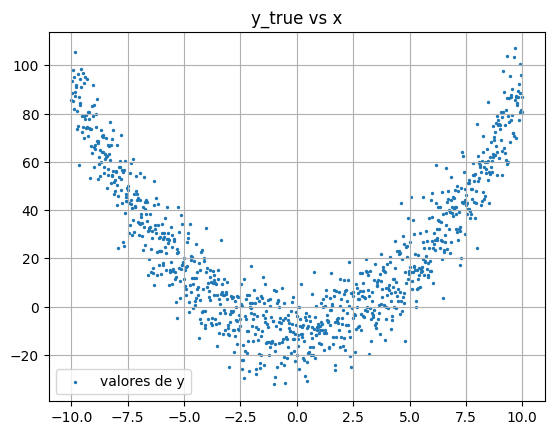

In [84]:
#plt.plot(x, label ="valores de x")
plt.scatter(x, y, label = "valores de y", s = 2)
plt.grid()
plt.title("y_true vs x")
plt.legend()


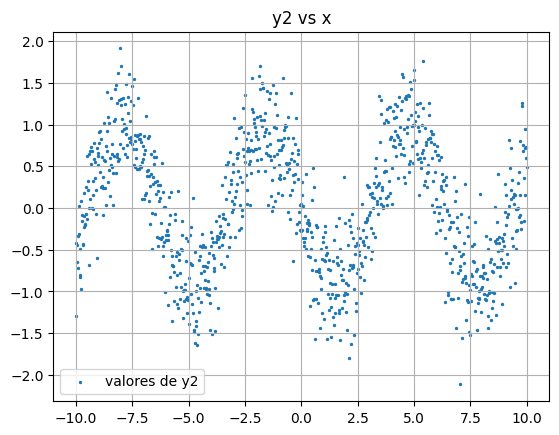

In [139]:
#plt.plot(x, label ="valores de x")
plt.scatter(x, y2, label = "valores de y2", s = 2)
plt.grid()
plt.title("y2 vs x")
plt.legend()


Ajustar los datos para trabajarlos con la red en pytorch

#escalados de datos con minmaxscaler


In [154]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = StandardScaler()
scy = StandardScaler()
x_sc = sc.fit_transform(x)
y2_sc = scy.fit_transform(x)

In [155]:
print(x_sc.shape, y2_sc.shape)

(1000, 1) (1000, 1)


In [123]:
x = x.reshape(-1, 1)

In [124]:
y = y.reshape(-1, 1)
y2 = y2.reshape(-1, 1)

In [159]:
# Suponiendo que tienes tus datos en las variables X y y
X_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)
y_train2 = torch.tensor(y2, dtype = torch.float32)

creacion de la red neuronal en pytorch

In [150]:
import torch
import torch.nn as nn
import torch.optim as optim


In [151]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.Sigmoid()
        self.fc2 = nn.Linear(10, 10)
        self.relu2 = nn.Sigmoid()
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


In [152]:
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [160]:
num_epochs = 10000

for epoch in range(num_epochs):
    # Paso de alimentación hacia adelante (forward pass)
    outputs = model(X_train)

    # Calcular la pérdida
    loss = criterion(outputs, y_train2)

    # Paso de retropropagación y actualización de pesos
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Imprimir el progreso del entrenamiento
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')


Epoch: 10/10000, Loss: 0.7158
Epoch: 20/10000, Loss: 0.5949
Epoch: 30/10000, Loss: 0.5974
Epoch: 40/10000, Loss: 0.5974
Epoch: 50/10000, Loss: 0.5967
Epoch: 60/10000, Loss: 0.5962
Epoch: 70/10000, Loss: 0.5956
Epoch: 80/10000, Loss: 0.5950
Epoch: 90/10000, Loss: 0.5943
Epoch: 100/10000, Loss: 0.5933
Epoch: 110/10000, Loss: 0.5922
Epoch: 120/10000, Loss: 0.5908
Epoch: 130/10000, Loss: 0.5893
Epoch: 140/10000, Loss: 0.5879
Epoch: 150/10000, Loss: 0.5866
Epoch: 160/10000, Loss: 0.5855
Epoch: 170/10000, Loss: 0.5846
Epoch: 180/10000, Loss: 0.5838
Epoch: 190/10000, Loss: 0.5832
Epoch: 200/10000, Loss: 0.5827
Epoch: 210/10000, Loss: 0.5822
Epoch: 220/10000, Loss: 0.5817
Epoch: 230/10000, Loss: 0.5813
Epoch: 240/10000, Loss: 0.5808
Epoch: 250/10000, Loss: 0.5804
Epoch: 260/10000, Loss: 0.5800
Epoch: 270/10000, Loss: 0.5796
Epoch: 280/10000, Loss: 0.5791
Epoch: 290/10000, Loss: 0.5787
Epoch: 300/10000, Loss: 0.5782
Epoch: 310/10000, Loss: 0.5777
Epoch: 320/10000, Loss: 0.5772
Epoch: 330/10000,

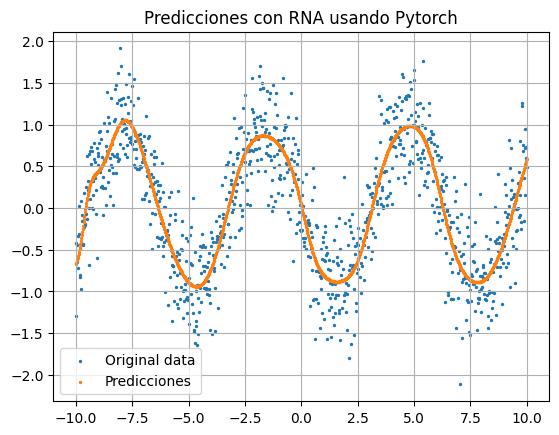

In [162]:
predicted = model(torch.from_numpy(x)).detach().numpy()


plt.scatter(x, y2, label = "Original data", s = 2)
plt.scatter(x, predicted, label = "Predicciones", s = 2)
plt.legend()
plt.grid()
plt.title("Predicciones con RNA usando Pytorch")
plt.show()

In [1]:
print(4*54)

216


In [ ]:
y

In [ ]:
x = x.reshape(-1, 1)
x.shape
y = y.reshape(-1, 1)
y.shape

(200, 1)

In [ ]:
y = np.array(y, dtype = np.float32)

In [ ]:
y

array([[ 87.185486  ],
       [102.90311   ],
       [ 83.97685   ],
       [ 87.230774  ],
       [ 89.72906   ],
       [ 79.86728   ],
       [ 70.86576   ],
       [ 68.018394  ],
       [ 65.74619   ],
       [ 63.11162   ],
       [ 77.959076  ],
       [ 58.34806   ],
       [ 76.14421   ],
       [ 75.084656  ],
       [ 78.90601   ],
       [ 55.715275  ],
       [ 55.13726   ],
       [ 60.464703  ],
       [ 61.099094  ],
       [ 55.314846  ],
       [ 30.69374   ],
       [ 56.266632  ],
       [ 43.33589   ],
       [ 55.97407   ],
       [ 45.62372   ],
       [ 51.110085  ],
       [ 57.20802   ],
       [ 42.58274   ],
       [ 44.206123  ],
       [ 42.89129   ],
       [ 32.262897  ],
       [ 26.122473  ],
       [ 39.71317   ],
       [ 59.606434  ],
       [  1.2225437 ],
       [ 36.057148  ],
       [ 35.350563  ],
       [ 29.442932  ],
       [ 44.491146  ],
       [ 26.024818  ],
       [ 34.547417  ],
       [ 28.706629  ],
       [ 45.901985  ],
       [ 36

In [ ]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779],
                    [6.182], [7.59], [2.167], [7.042],
 [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
 [3.366], [2.596], [2.53], [1.221], [2.827],
 [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [ ]:
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]], dtype=float32)

In [ ]:
len(x_train)

15

In [ ]:
model = nn.Linear(in_features = input_size, out_features = output_size)


In [ ]:
model

RedNeuronal(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
class RedNeuronal(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1, 2)
    self.fc2 = nn.Linear(2, 3)
    self.fc3 = nn.Linear(3, 3)
    self.fc4 = nn.Linear(3, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    x = F.relu(x)

    return x

model = RedNeuronal()

model


RedNeuronal(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (fc4): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)

In [ ]:
"codigo para entrenar el modelo"
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x)
  targets = torch.from_numpy(y)
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch +1) % 5 == 0:
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, loss.item()))




Epoch [5/10000], Loss: 742.6777
Epoch [10/10000], Loss: 714.3994
Epoch [15/10000], Loss: 704.0438
Epoch [20/10000], Loss: 695.1621
Epoch [25/10000], Loss: 687.6015
Epoch [30/10000], Loss: 680.9177
Epoch [35/10000], Loss: 674.7463
Epoch [40/10000], Loss: 668.8640
Epoch [45/10000], Loss: 663.3222
Epoch [50/10000], Loss: 657.7761
Epoch [55/10000], Loss: 653.0444
Epoch [60/10000], Loss: 656.1305
Epoch [65/10000], Loss: 642.8267
Epoch [70/10000], Loss: 636.5990
Epoch [75/10000], Loss: 631.5882
Epoch [80/10000], Loss: 626.7726
Epoch [85/10000], Loss: 621.5214
Epoch [90/10000], Loss: 616.7294
Epoch [95/10000], Loss: 616.7561
Epoch [100/10000], Loss: 607.8352
Epoch [105/10000], Loss: 600.1489
Epoch [110/10000], Loss: 594.1541
Epoch [115/10000], Loss: 589.9307
Epoch [120/10000], Loss: 586.1525
Epoch [125/10000], Loss: 584.2705
Epoch [130/10000], Loss: 582.6313
Epoch [135/10000], Loss: 576.4573
Epoch [140/10000], Loss: 572.5844
Epoch [145/10000], Loss: 569.3959
Epoch [150/10000], Loss: 565.7785


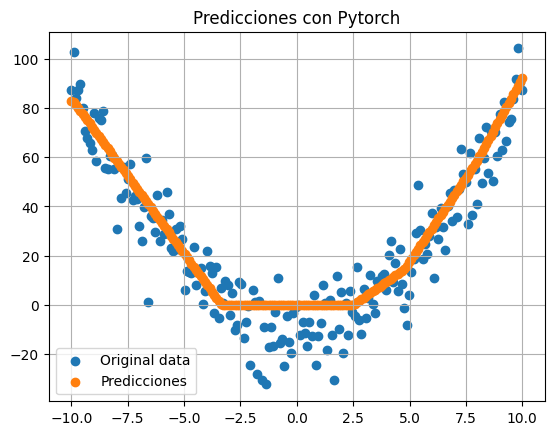

In [ ]:
predicted = model(torch.from_numpy(x)).detach().numpy()
plt.scatter(x, y, label = "Original data")
plt.scatter(x, predicted, label = "Predicciones")
plt.legend()
plt.grid()
plt.title("Predicciones con Pytorch")
plt.show()